## Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('movie_metadata.csv')

Matplotlib is building the font cache; this may take a moment.


## Step 2: Initial Exploration

In [2]:
# Display basic info
print(df.info())

# Show first few rows
df.head()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Step 3: Data Cleaning

#### Handle Missing Values

In [3]:
# Drop rows with too many missing values (like the Doug Walker entry)
df = df.dropna(thresh=20)  # Keep rows with at least 20 non-NA values

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#### Clean Specific Columns

In [4]:
# Clean movie_title column (remove trailing spaces and special characters)
df['movie_title'] = df['movie_title'].str.strip()
df['movie_title'] = df['movie_title'].str.replace(' ', '')

# Clean color column
df['color'] = df['color'].replace({'Color': 'color', ' Black and White': 'black_and_white'})
df['color'] = df['color'].fillna('color')

# Clean genres column (split into multiple columns if needed)
df['genres'] = df['genres'].str.replace('|', ', ')

# Clean country column (standardize country names)
df['country'] = df['country'].str.upper()

#### Handle Duplicates

In [5]:
# Check for duplicate movie titles
print(f"Duplicate movie titles: {df.duplicated(subset=['movie_title']).sum()}")

# Drop duplicates keeping the first occurrence
df = df.drop_duplicates(subset=['movie_title'], keep='first')

Duplicate movie titles: 127


#### Convert Data Types

In [6]:
# Convert budget and gross to numeric (remove commas, handle missing values)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# Convert title_year to integer
df['title_year'] = df['title_year'].fillna(0).astype(int)
df['title_year'] = df['title_year'].replace(0, np.nan)

#### Create New Features

In [7]:
# Calculate profit
df['profit'] = df['gross'] - df['budget']

# Calculate return on investment (ROI)
df['roi'] = (df['profit'] / df['budget']) * 100

# Extract first genre as main_genre
df['main_genre'] = df['genres'].str.split(',').str[0]

## Step 4: Outlier Detection and Handling

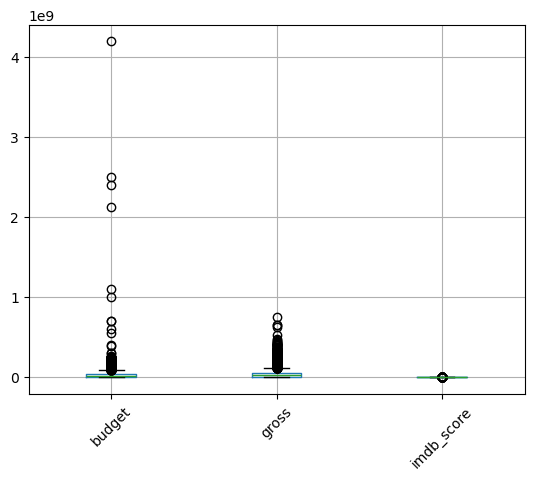

In [9]:
# Visualize numerical columns for outliers
df[['budget', 'gross', 'imdb_score']].boxplot()
plt.xticks(rotation=45)
plt.show()

# Handle outliers (cap extreme values)
cols_to_cap = ['budget', 'gross', 'duration']
for col in cols_to_cap:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, 
                      np.where(df[col] > upper_bound, upper_bound, df[col]))

## Step 5: Final Checks and Save Clean Data

In [10]:
# Check cleaned data info
print(df.info())

# Check missing values after cleaning
print(df.isnull().sum())

# Save cleaned data to new CSV
df.to_csv('cleaned_movie_metadata.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5042
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4909 non-null   object 
 1   director_name              4909 non-null   object 
 2   num_critic_for_reviews     4909 non-null   float64
 3   duration                   4909 non-null   float64
 4   director_facebook_likes    4909 non-null   float64
 5   actor_3_facebook_likes     4909 non-null   float64
 6   actor_2_name               4909 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4909 non-null   float64
 9   genres                     4909 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4909 non-null   object 
 12  num_voted_users            4909 non-null   int64  
 13  cast_total_facebook_likes  4909 non-null   int64  
 1